In [85]:
import pandas as pd

X = pd.read_csv('data/Xtr6.csv')
y = pd.read_csv('data/Ytr1.csv')
Xte = pd.read_csv('data/Xte6.csv')
pred = pd.read_csv('data/pred.csv')

In [6]:
# MAE calculation
# sum(abs(y*-y))/n

from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [48]:
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [75]:
X_test.shape

(692, 21)

In [99]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = False)
model.fit(X_train,y_train)
#print(model.score(X_test,y_test))

print('%s, mae = %.4f, model score = %.4f' % (type(model),mean_absolute_error(y_test,model.predict(X_test)),model.score(X_test,y_test)))

<class 'sklearn.linear_model._base.LinearRegression'>, mae = 179.1456, model score = -44908.2886


In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)

model = SGDRegressor(loss = 'epsilon_insensitive', alpha = 0, epsilon = 0).fit(X_train,y_train)
print('%s, mae = %.4f, model score = %.4f' % (type(model),mean_absolute_error(y_test,model.predict(X_test)),model.score(X_test,y_test)))

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>, mae = 0.1690, model score = -0.0161


C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler


model = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree = 3, include_bias = True),
    LinearRegression(fit_intercept = False)
)
model.fit(X_train,y_train)
#print(model.score(X_test,y_test))

print('%s, mae = %.4f, model score = %.4f' % (type(model),mean_absolute_error(y_test,model.predict(X_test)),model.score(X_test,y_test)))

<class 'sklearn.pipeline.Pipeline'>, mae = 167883319.2463, model score = -4118944683734565888.0000


In [127]:
from sklearn.neighbors import KNeighborsRegressor

model=KNeighborsRegressor(1).fit(X_train,y_train)
print('%s, mae = %.4f, model score = %.4f' % (type(model),mean_absolute_error(y_test,model.predict(X_test)),model.score(X_test,y_test)))

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>, mae = 0.1789, model score = -0.1025


In [130]:
model=KNeighborsRegressor(1).fit(X,y)
pred9 = pred.copy()
pred9['total'] = model.predict(Xte)
pred9.to_csv('data/pred9.csv', index = False)

In [131]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(30,max_depth = 4).fit(X_train,y_train)
print('%s, mae = %.4f, model score = %.4f' % (type(model),mean_absolute_error(y_test,model.predict(X_test)),model.score(X_test,y_test)))

C:\Users\Benson\AppData\Local\Temp/ipykernel_10092/3031114044.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(30,max_depth = 4).fit(X_train,y_train)


<class 'sklearn.ensemble._forest.RandomForestRegressor'>, mae = 0.4995, model score = -0.1360


In [132]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes = (8,6), activation = 'logistic', solver = 'lbfgs').fit(X_train,y_train)
print('%s, mae = %.4f, model score = %.4f' % (type(model),mean_absolute_error(y_test,model.predict(X_test)),model.score(X_test,y_test)))

C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>, mae = 0.2801, model score = -0.7634


C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [151]:
X[['fi1','fi2','fi3','fi4','fi5','fi6','fi7']]
# 1 width, 2 height, 3 mean intensity, 4 darkest,
# 5 mean R, 6 mean G, 7 mean B

,fi1,fi2,fi3,fi4,fi5,fi6,fi7
0,15.0,15.0,140.476667,1.0,77.377778,118.466667,122.182222
1,21.0,15.0,167.661376,3.0,205.847619,156.717460,140.419048
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,15.0,15.0,174.823704,17.0,127.768889,195.306667,201.395556
...,...,...,...,...,...,...,...
6909,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
6910,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
6911,14.0,15.0,169.058333,32.0,47.142857,155.347619,219.523810
6912,15.0,15.0,139.563333,0.0,188.173333,89.848889,25.231111


In [ ]:
channels = 
filters = np.zeros(shape = (7,7,channels,2))

In [152]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

model = tf.keras.models.Sequential()
model.add(Conv2D(filters=64, kernel_size = 1, batch_input_shape = (16,10,10,3)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (16, 10, 10, 64)          256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[6914, 21]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd", metrics=["accuracy"])

history = model.fit(Xtr5, Ytr1, epochs=30)

In [168]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Rf_Xtr, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [169]:
print('%s, mae = %.4f, model score = %.4f' % (type(rf_random),mean_absolute_error(y_test,rf_random.predict(Rf_Xte)),rf_random.score(Rf_Xte,y_test)))

<class 'sklearn.model_selection._search.RandomizedSearchCV'>, mae = 18.1506, model score = -0.0524


In [171]:
predX = Xte[['fi3','fi6','FT0008']].copy()

predrf = pred.copy()
predrf['total'] = rf_random.predict(predX)
predrf.to_csv('data/predrf.csv', index = False)

In [164]:
Rf_Xtr = X_train[['fi3','fi6','FT0008']].copy()
Rf_Xte = X_test[['fi3','fi6','FT0008']].copy()
model = RandomForestRegressor(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1).fit(Rf_Xtr,y_train)
print('%s, mae = %.4f, model score = %.4f' % (type(model),mean_absolute_error(y_test,model.predict(Rf_Xte)),model.score(Rf_Xte,y_test)))

C:\Users\Benson\AppData\Local\Temp/ipykernel_10092/97138366.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1).fit(Rf_Xtr,y_train)


<class 'sklearn.ensemble._forest.RandomForestRegressor'>, mae = 18.1794, model score = 0.0113


array([[-0.04780448, -0.77880773,  0.94426355, ..., -0.39812038,
        -0.41385162, -0.32659447],
       [-0.05780884, -0.02344745,  0.20116272, ..., -0.40606454,
        -0.42169101, -0.33494897],
       [-0.07781755, -0.77880773,  0.94426355, ..., -0.40018493,
        -0.41588895, -0.32876567],
       ...,
       [-0.07781755,  1.50088322,  0.94426355, ...,  3.97311513,
        -0.40480898, -0.3169528 ],
       [-0.07781755, -0.77880773,  0.94426355, ..., -0.39751071,
        -0.41324999, -0.32595331],
       [-0.07781755,  0.56178665, -0.39331794, ..., -0.299137  ,
        -0.31618286, -0.22250811]])

In [134]:
best = 1
score = 0
bestmae = 0
for k in range(1,50):
    model=KNeighborsRegressor(k).fit(X_train,y_train)
    mae = mean_absolute_error(y_test,model.predict(X_test))
    if k==1:
        bestmae = mae
        score = model.score(X_test,y_test)
    elif bestmae > mae:
        best = k
        score = model.score(X_test,y_test)
    
print(best,score)

1 -0.10245954038900207


1
2
3
4
5
6
7
8
9


In [81]:
def get_models():
    models = list()
    models.append(LinearRegression())
    models.append(SGDRegressor())
    return models

In [83]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

models = get_models()

for model in models:
    mdl = model
    mdl.fit(X_train, y_train)
    print('%s, mae = %.4f' % (type(mdl),mean_absolute_error(y_test,model.predict(X_test))) )

<class 'sklearn.linear_model._base.LinearRegression'>, mae = 22.7378
<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>, mae = 125623007904935920.0000


C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:
(X_train_full,y_train_full),(X_test_full,y_test_full)=tf.keras.datasets.mnist.load_data()




In [1]:
# Make corpus and vocab
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

XYtr = pd.read_csv('data/XYtr.csv')
Xte = pd.read_csv('data/Xte.csv')

K = 10
XYtr['description'] = XYtr['description'].fillna("NAN")
Xte['description'] = Xte['description'].fillna("NAN")
corpus = list(XYtr['description'])+list(Xte['description'])
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(corpus)

# https://stackoverflow.com/questions/62777131/how-to-remove-frequent-infrequent-features-from-sklearn-countvectorizer 
# Code to remove top X% most frequent words (use this to remove stop words).

total_features = len(vectorizer.vocabulary_)
top_vect = CountVectorizer(max_features=int(total_features * 0.1))
top_bow = top_vect.fit_transform(corpus)

# Create a list of (term, frequency) tuples sorted by their frequency
sum_words = bow.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

# Keep only the terms in a list
vocabulary, _ = zip(*words_freq[:int(total_features*0.9)])
vocabulary = list(vocabulary)

bottom_vect = CountVectorizer(vocabulary=vocabulary)
corpus = bottom_vect.fit_transform(corpus)

In [2]:
lda = LatentDirichletAllocation(n_components = K)
lda.fit(top_bow)
topics = lda.transform(top_bow)
N = XYtr.shape[0]
topics

array([[0.25710412, 0.33725878, 0.00625072, ..., 0.00625065, 0.26083832,
        0.00625084],
       [0.03335139, 0.03335086, 0.03334237, ..., 0.03334682, 0.03334283,
        0.03333608],
       [0.00357164, 0.00357169, 0.00357191, ..., 0.96785524, 0.00357156,
        0.00357162],
       ...,
       [0.00312523, 0.00312525, 0.00312538, ..., 0.97187328, 0.00312513,
        0.00312519],
       [0.00357213, 0.15779698, 0.0035719 , ..., 0.00357235, 0.00357211,
        0.00357185],
       [0.0038464 , 0.00384646, 0.00384679, ..., 0.96538233, 0.00384631,
        0.00384637]])

6914.0

In [30]:
test = X.copy()
test['FT0000'] = topics[:6914,0]
test['FT0000']

0       0.257104
1       0.033351
2       0.003572
3       0.004000
4       0.050000
          ...   
6909    0.001613
6910    0.003125
6911    0.002083
6912    0.006667
6913    0.050000
Name: FT0000, Length: 6914, dtype: float64

In [5]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

model = TruncatedSVD(n_components=K, n_iter=7, random_state=0)
model.fit(top_bow)
topics = model.transform(top_bow)
topics  

array([[ 1.43161588,  0.24652816,  0.22177263, ..., -0.099876  ,
         0.61554848,  0.08718529],
       [ 0.30409655,  0.01669452,  0.00810491, ...,  0.02971258,
         0.43923616, -0.40024301],
       [ 3.3261478 , -3.94115388,  0.64714994, ...,  0.51371678,
         0.19499146,  0.2492913 ],
       ...,
       [ 3.83330391, -4.30734439, -0.62177378, ..., -0.55939886,
        -0.40326657, -0.14368511],
       [ 2.60179376,  0.44996714, -0.66797108, ..., -0.10036708,
         0.65804169, -0.00762425],
       [ 3.32251887, -3.9228537 ,  0.63664996, ...,  0.49619847,
         0.18795062,  0.23923515]])

In [3]:
fp = open('data/lda-tr.csv', 'w')
fp.write('id')
for k in range(K):
    fp.write(',FT%04d' % k)

fp.write('\n')
for i in range(N):
    id = XYtr.loc[i,'id']
    fp.write('%s' % id)
    for k in range(K):
        fp.write(',%f' % topics[i, k])
    
    fp.write('\n')

fp.close()    

fp = open('data/lda-te.csv', 'w')
fp.write('id')
for k in range(K):
    fp.write(',FT%04d' % k)

fp.write('\n')
for i in range(N):
    id = Xte.loc[i,'id']
    fp.write('%s' % id)
    for k in range(K):
        fp.write(',%f' % topics[i + N, k])
    
    fp.write('\n')

fp.close()

In [8]:
tsvd_tr = pd.read_csv('data/tsvd-tr.csv')
tsvd_te = pd.read_csv('data/tsvd-te.csv')

In [12]:
tsvd_tr

,id,FT0000,FT0001,FT0002,FT0003,FT0004,FT0005,FT0006,FT0007,FT0008,FT0009
0,a44a5f4c5e13910205404271e750e7bc,1.431616,0.246528,0.221773,0.021017,0.261604,-0.125615,-0.352360,-0.099876,0.615548,0.087185
1,5cd06ad38bc1e842b7f3e37210b8e574,0.304097,0.016695,0.008105,0.047117,0.221799,-0.208682,0.006000,0.029713,0.439236,-0.400243
2,239eff19cbe449331801cd1e89c84d2c,3.326148,-3.941154,0.647150,-1.572782,-0.178286,-1.132487,0.162826,0.513717,0.194991,0.249291
3,5034105b2e14a5d71522ed8054db89ac,2.196311,0.148855,-1.269554,0.747390,-1.254379,0.265819,-0.108583,3.091442,-1.385208,0.804617
4,ab4d2c1023ad1b13f937988ea8cae5f4,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6909,b8b18cdc1f066586eb2a3c5326d2bb66,7.841613,1.273063,-1.753467,-0.058949,0.258772,-0.854989,0.709686,1.095832,-0.146980,-0.821673
6910,d3cc7ebd0a8001ede39dfebcc05cf9be,3.842331,-4.342078,-0.629424,1.323364,0.381623,0.772882,0.480962,-0.569983,-0.397561,-0.135589
6911,1912ac374a2e56327989f468cc4f09b9,2.987928,0.708736,-1.516271,-3.008431,-5.641490,0.833666,2.083686,-2.151130,-1.267769,-1.864683
6912,22907775e92c304ccf77744d9c1989be,0.852693,-0.111154,-1.050100,-0.694975,0.374719,0.358613,0.034914,-0.477641,-0.090754,0.120431


In [4]:
lda_tr = pd.read_csv('data/lda-tr.csv')
lda_te = pd.read_csv('data/lda-te.csv')

In [7]:
Xtr1 = X.drop(['FT0000','FT0001','FT0002','FT0003','FT0004','FT0005','FT0006','FT0007','FT0008','FT0009'],axis = 1)
Xte1 = Xte.drop(['FT0000','FT0001','FT0002','FT0003','FT0004','FT0005','FT0006','FT0007','FT0008','FT0009'],axis = 1)

In [95]:
Xtr2 = pd.concat([Xtr1,lda_tr], axis = 1)
Xte2 = pd.concat([Xte1,lda_te], axis = 1)

In [96]:
Xtr2 = Xtr2.drop(['id'], axis = 1)
Xte2 = Xte2.drop(['id'], axis = 1)

In [98]:
Xtr2.to_csv('data/Xtr_lda.csv', index = False)
Xtr2.to_csv('data/Xte_lda.csv', index = False)

In [97]:
Xtr2

,X.sales,cdate,fee1,fee2,fi1,fi2,fi3,fi4,fi5,fi6,...,FT0000,FT0001,FT0002,FT0003,FT0004,FT0005,FT0006,FT0007,FT0008,FT0009
0,1.0,18012.0,250.0,500.0,15.0,15.0,140.476667,1.0,77.377778,118.466667,...,0.257104,0.337259,0.006251,0.006251,0.107293,0.006251,0.006252,0.006251,0.260838,0.006251
1,42.0,18561.0,250.0,500.0,21.0,15.0,167.661376,3.0,205.847619,156.717460,...,0.033351,0.033351,0.033342,0.033345,0.033342,0.033333,0.699909,0.033347,0.033343,0.033336
2,3.0,18012.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.003572,0.003572,0.003572,0.003572,0.003572,0.003572,0.003572,0.967855,0.003572,0.003572
3,4.0,18012.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.963997
4,1.0,18012.0,300.0,550.0,15.0,15.0,174.823704,17.0,127.768889,195.306667,...,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,3.0,18593.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.001613,0.985481,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613
6910,2.0,18012.0,750.0,1000.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.003125,0.003125,0.003126,0.003125,0.003125,0.003125,0.003125,0.971873,0.003125,0.003125
6911,2.0,18024.0,0.0,250.0,14.0,15.0,169.058333,32.0,47.142857,155.347619,...,0.002083,0.002084,0.002083,0.002084,0.002083,0.981248,0.002084,0.002083,0.002084,0.002084
6912,2.0,18790.0,200.0,450.0,15.0,15.0,139.563333,0.0,188.173333,89.848889,...,0.006667,0.006668,0.006669,0.006669,0.939986,0.006669,0.006668,0.006668,0.006668,0.006667


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Xtr2 = scaler.fit_transform(Xtr2)
Xte2 = scaler.transform(Xte2)

from sklearn.linear_model import SGDRegressor

model5 = SGDRegressor(loss = 'epsilon_insensitive', alpha = 0, epsilon = 0).fit(Xtr2, y)
pred5 = pred.copy()
pred5['total'] = model5.predict(Xte2)
pred5.to_csv('data/pred_lda_sgd.csv', index = False)

C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
print('%s, mae = %.4f, model score = %.4f' % (type(model5),mean_absolute_error(y,model5.predict(Xte2)),model5.score(Xte2,y)))

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>, mae = 9.6753, model score = -0.0166


In [34]:
from sklearn.neighbors import KNeighborsRegressor

model=KNeighborsRegressor(49).fit(Xtr2,y)
print('%s, mae = %.4f, model score = %.4f' % (type(model),mean_absolute_error(y,model.predict(Xte2)),model.score(Xte2,y)))

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>, mae = 17.7119, model score = -0.1013


In [35]:
pred5 = pred.copy()
pred5['total'] = model.predict(Xte2)
pred5.to_csv('data/pred_lda_knr.csv', index = False)

In [33]:
best = 1
score = 0
bestmae = 0
for k in range(1,50):
    model=KNeighborsRegressor(k).fit(Xtr2,y)
    mae = mean_absolute_error(y,model.predict(Xte2))
    if k==1:
        bestmae = mae
        score = model.score(Xte2,y)
    elif bestmae > mae:
        best = k
        score = model.score(Xte2,y)
    
print(best,score)

49 -0.1013112344910343


In [36]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes = (8,6), activation = 'logistic', solver = 'lbfgs').fit(Xtr2,y)
print('%s, mae = %.4f, model score = %.4f' % (type(model),mean_absolute_error(y,model.predict(Xte2)),model.score(Xte2,y)))

C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>, mae = 17.6250, model score = -0.1265


C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
import tensorflow as tf

def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model



In [42]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(Xtr2))

In [65]:
normte = tf.keras.layers.Normalization(axis=-1)
normte.adapt(np.array(Xte2))

In [49]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 21)                43        
_________________________________________________________________
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,676
Trainable params: 5,633
Non-trainable params: 43
_________________________________________________________________


In [58]:
train_labels = y.pop('total')

In [61]:
%%time
history = dnn_model.fit(
    Xtr2,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 13.3 s


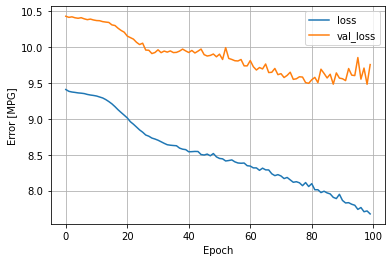

In [64]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [66]:
test_predictions = dnn_model.predict(Xte).flatten()

In [73]:
test_pred = (test_predictions - min(test_predictions))/(max(test_predictions) - min(test_predictions))

test_pred

pred5 = pred.copy()
pred5['total'] = test_pred
pred5.to_csv('data/pred_lda_tfreg.csv', index = False)

In [91]:
test_pred

array([0.4150952 , 0.40616694, 0.5057432 , ..., 0.35862324, 0.38709095,
       0.3172301 ], dtype=float32)

In [55]:
mean_absolute_error(y,testnp)

9.684578769609086

In [31]:
Xtr2

array([[-0.07386261, -0.78120744, -0.5305535 , ..., -0.6084826 ,
         1.14615454, -0.30094203],
       [ 0.27845913,  1.08654395, -0.5305535 , ..., -0.54221346,
        -0.18703525, -0.17878649],
       [-0.05667618, -0.78120744,  0.9514467 , ...,  1.74332818,
        -0.36150235, -0.31302454],
       ...,
       [-0.06526939, -0.74038228, -1.2715536 , ..., -0.61867634,
        -0.37022248, -0.31973554],
       [-0.06526939,  1.86562422, -0.67875352, ..., -0.60746273,
        -0.34335885, -0.29906584],
       [-0.04808297,  1.02870829,  1.6924468 , ..., -0.50148494,
        -0.08942017, -0.10363049]])

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xtr2, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [88]:
predrf = pred.copy()
predrf['total'] = rf_random.predict(Xte2)
predrf.to_csv('data/pred_lda_rfrscv.csv', index = False)

In [93]:
predrf['total'] = (predrf['total'] - min(predrf['total']))/(max(predrf['total']) - min(predrf['total']))
predrf.to_csv('data/pred_lda_rfrscv_normalized.csv', index = False)

In [94]:
Xte2

array([[-0.06526939, -0.68779798, -0.23415346, ..., -0.60152942,
         3.13317255, -0.28812438],
       [-0.07386261, -0.77805771, -0.5305535 , ..., -0.50148494,
        -0.08942017, -0.10363049],
       [ 0.02066274,  0.07121392, -1.2715536 , ..., -0.60153676,
        -0.32915347, -0.28812438],
       ...,
       [-0.07386261, -0.77805773,  0.9514467 , ...,  1.75315507,
        -0.3641219 , -0.31504055],
       [-0.07386261, -0.77805729, -0.5305535 , ..., -0.61503467,
        -0.36150235, -0.31302454],
       [-0.06526939, -0.77805773,  0.9514467 , ...,  1.73727992,
        -0.35989663, -0.31178878]])